In [30]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf


In [31]:
data=pd.read_csv("C:/Users/Admin/Desktop/ds/50_Startups.csv")

In [32]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA
data.info()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [34]:
data1=data.rename({'R&D Spend':'rdspend','Administration':'admin','Marketing Spend':'ms'},axis=1)

In [35]:
data1

,rdspend,admin,ms,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [36]:
data1.describe()

,rdspend,admin,ms,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correlation

In [37]:
data1.corr()

,rdspend,admin,ms,Profit
rdspend,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
ms,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [38]:
data1.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of     rdspend  admin     ms  State  Profit
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False
4     False  False  False  False   False
5     False  False  False  False   False
6     False  False  False  False   False
7     False  False  False  False   False
8     False  False  False  False   False
9     False  False  False  False   False
10    False  False  False  False   False
11    False  False  False  False   False
12    False  False  False  False   False
13    False  False  False  False   False
14    False  False  False  False   False
15    False  False  False  False   False
16    False  False  False  False   False
17    False  False  False  False   False
18    False  False  False  False   False
19    False  False  False  False   False
20    False  False  False  False   False
21    False  False  False  False   F

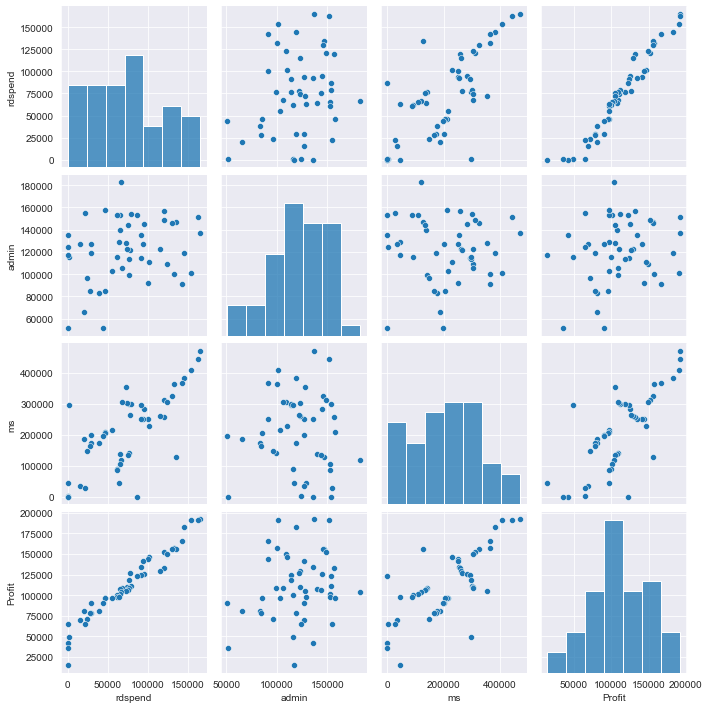

In [39]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# Model building

In [40]:
model=smf.ols('Profit~rdspend+admin+ms',data=data1).fit()

In [41]:
model

# Model Testing

In [42]:
model.params

Intercept    50122.192990
rdspend          0.805715
admin           -0.026816
ms               0.027228
dtype: float64

In [43]:
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
rdspend      17.846374
admin        -0.525507
ms            1.655077
dtype: float64 
 Intercept    1.057379e-09
rdspend      2.634968e-22
admin        6.017551e-01
ms           1.047168e-01
dtype: float64


In [44]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [45]:
# Build slr and mlr models for insignificant variables 'admin' and 'ms'
# Also find their tvalues and pvalues

In [46]:
slr_admin=smf.ols('Profit~admin',data=data1).fit()

In [47]:
slr_admin.params

Intercept    76974.471305
admin            0.288749
dtype: float64

In [48]:
slr_admin.pvalues,slr_admin.tvalues

(Intercept    0.003824
 admin        0.162217
 dtype: float64,
 Intercept    3.040044
 admin        1.419493
 dtype: float64)

In [49]:
slr_ms=smf.ols('Profit~ms',data=data1).fit()

In [50]:
slr_ms.params

Intercept    60003.548816
ms               0.246459
dtype: float64

In [51]:
slr_ms.pvalues,slr_ms.tvalues

(Intercept    4.294735e-10
 ms           4.381073e-10
 dtype: float64,
 Intercept    7.808356
 ms           7.802657
 dtype: float64)

In [52]:
#multilinear regression model

In [53]:
ml_admin_ms=smf.ols('Profit~admin+ms',data=data1).fit()

In [54]:
ml_admin_ms.params

Intercept    20224.429059
admin            0.323673
ms               0.248844
dtype: float64

In [55]:
ml_admin_ms.pvalues,ml_admin_ms.tvalues

(Intercept    2.589341e-01
 admin        1.729198e-02
 ms           9.727245e-11
 dtype: float64,
 Intercept    1.142741
 admin        2.467779
 ms           8.281039
 dtype: float64)

# Model Validation

# calculating VIF

In [56]:
rsq_rdspend=smf.ols('rdspend~admin+ms',data=data1).fit().rsquared
vif_rdspend=1/(1-rsq_rdspend)

In [57]:
vif_rdspend

2.4689030699947017

In [58]:
rsq_admin=smf.ols('admin~rdspend+ms',data=data1).fit().rsquared
vif_admin=1/(1-rsq_admin)

In [59]:
vif_admin

1.1750910070550458

In [60]:
rsq_ms=smf.ols('ms~admin+rdspend',data=data1).fit().rsquared
vif_ms=1/(1-rsq_ms)

In [61]:
vif_ms

2.3267732905308773

In [62]:
dataframe={'variables':['rdspend','admin','ms'],'vif':[vif_rdspend,vif_admin,vif_ms]}

In [63]:
dataframe

{'variables': ['rdspend', 'admin', 'ms'],
 'vif': [2.4689030699947017, 1.1750910070550458, 2.3267732905308773]}

In [64]:
vif_df=pd.DataFrame(dataframe)

In [65]:
vif_df

,variables,vif
0,rdspend,2.468903
1,admin,1.175091
2,ms,2.326773


In [66]:
# None vssariable has VIF>20, No Collinearity, so consider all varaibles in Regression equation


In [67]:
#Q-Q plot
import statsmodels.api as sm


C:\Users\Admin\IBA_IOAPDATA\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


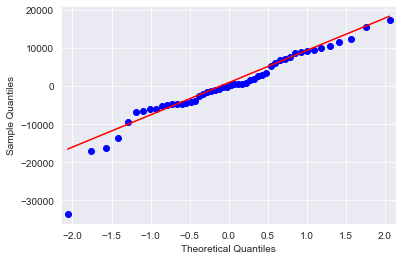

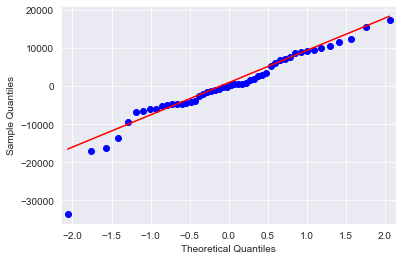

In [68]:
sm.qqplot(model.resid,line='q')

In [69]:
import numpy as np
list(np.where(model.resid>1000))

[array([ 1,  2,  3, 10, 11, 12, 13, 16, 19, 20, 25, 28, 34, 35, 36, 38, 40,
        41, 43, 45], dtype=int64)]

In [70]:
def standardized(values):
   return (values-values.mean())/values.std()

In [71]:
import matplotlib.pyplot as plt

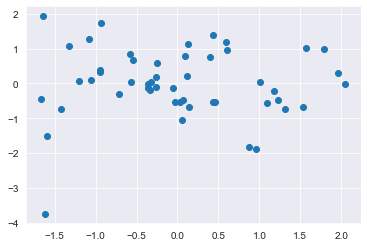

In [72]:
plt.scatter(standardized(model.fittedvalues),standardized(model.resid))

In [73]:
#residual Vs regressor

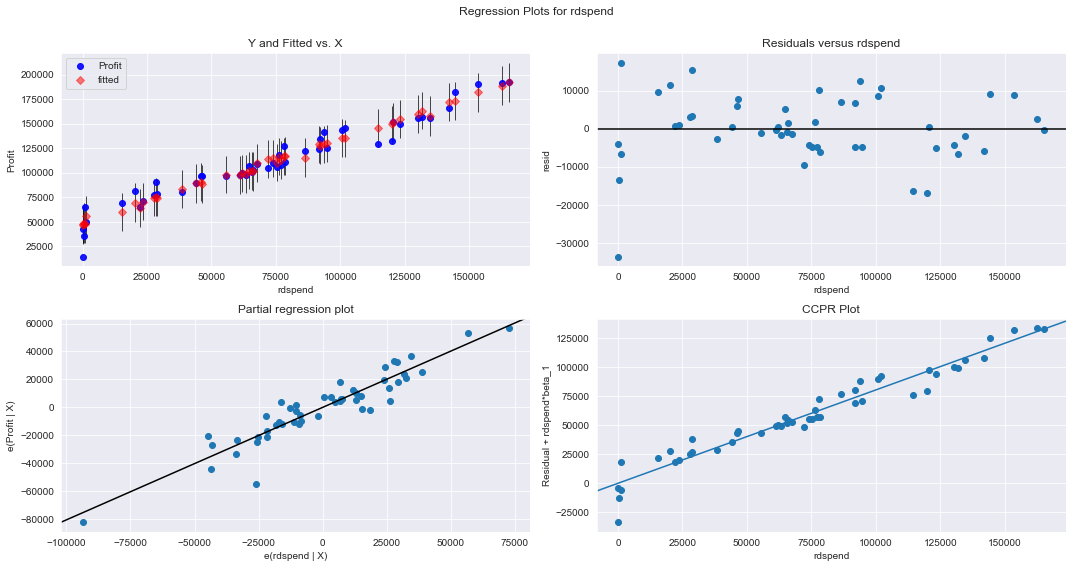

In [74]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rdspend", fig=fig)
plt.show()

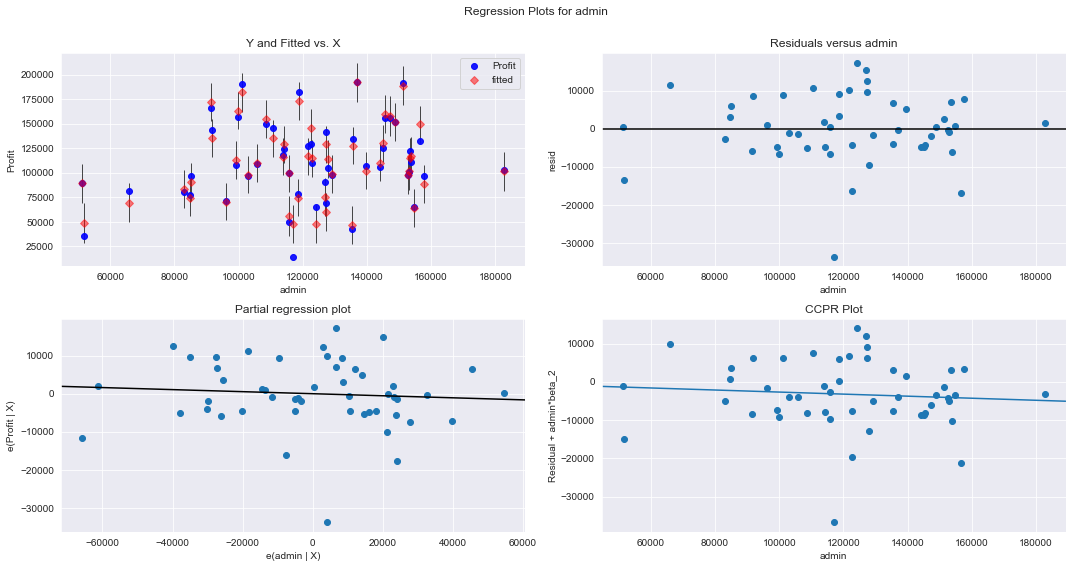

In [75]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "admin", fig=fig)
plt.show()

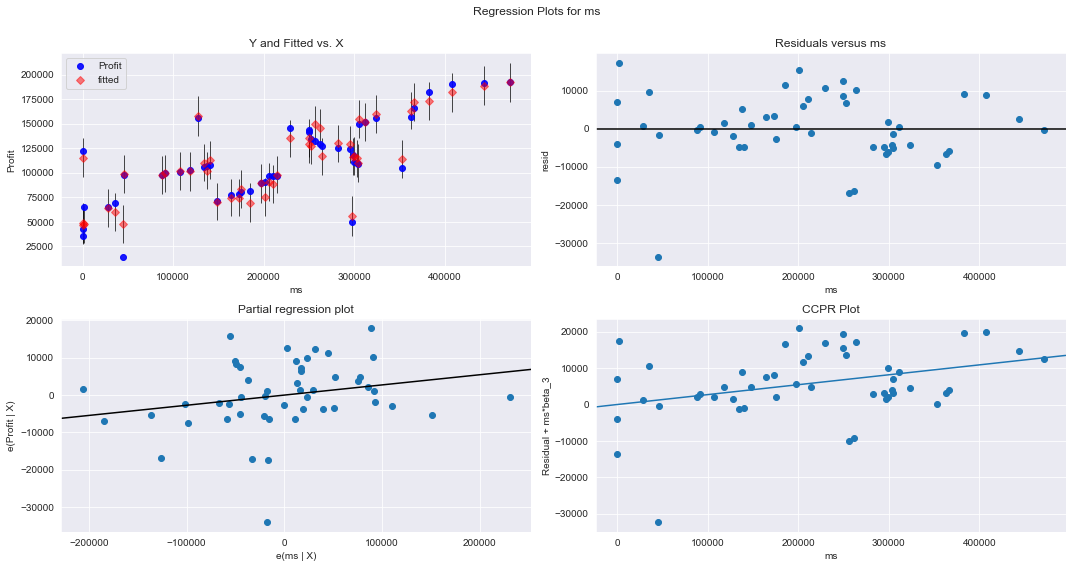

In [76]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ms", fig=fig)
plt.show()

# cooks distance

In [78]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

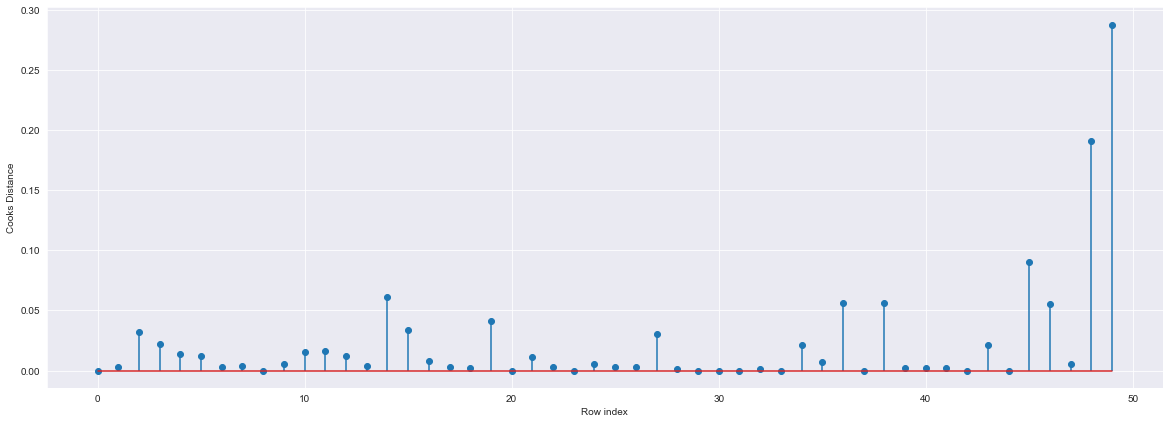

In [79]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [80]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

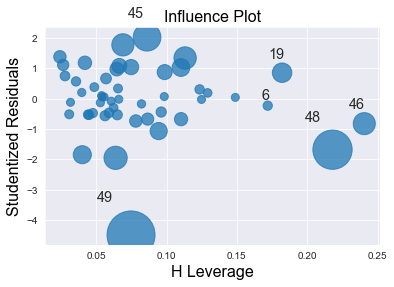

In [81]:
#high influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [82]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [83]:
#from above graph data point 49 is influencer
data1[data1.index.isin([49])]

,rdspend,admin,ms,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [84]:
data1.head()

,rdspend,admin,ms,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [85]:
#see the difference in rdspend and other vairaibles


In [86]:
#improving the model

In [87]:
data2=pd.read_csv("C:/Users/Admin/Desktop/ds/50_Startups.csv")

In [88]:
data2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [89]:
#deleting influencer rows
data3=data2.drop(data2.index[[49]],axis=0).reset_index()

In [90]:
data3

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [91]:
data3=data3.drop(['index'],axis=1)

In [92]:
data3

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [93]:

final_mlr= smf.ols('Profit~rdspend+admin+ms',data = data1).fit()

In [94]:
(final_mlr.rsquared,final_mlr.aic)

(0.9507459940683246, 1058.7714985998055)

# Model Prediction

In [97]:
new_data=pd.DataFrame({'rdspend':70000,"admin":90000,"ms":140000},index=[0])
new_data

,rdspend,admin,ms
0,70000,90000,140000


In [98]:
final_mlr.predict(new_data)

0    107920.738401
dtype: float64

In [100]:
pred_y=final_mlr.predict(data1)
pred_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


# table containing R^2 value for each prepared model


In [102]:
d2={'Prep_Models':['model','final_mlr'],'Rsquared':[model.rsquared,final_mlr.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,model,0.950746
1,final_mlr,0.950746
